## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
dataset=pd.read_csv("irisds.csv",header=None)

In [3]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Target']

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data preprocessing

### Data cleaning

### Checking for null values

In [9]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

### Checking for outlier

<AxesSubplot:>

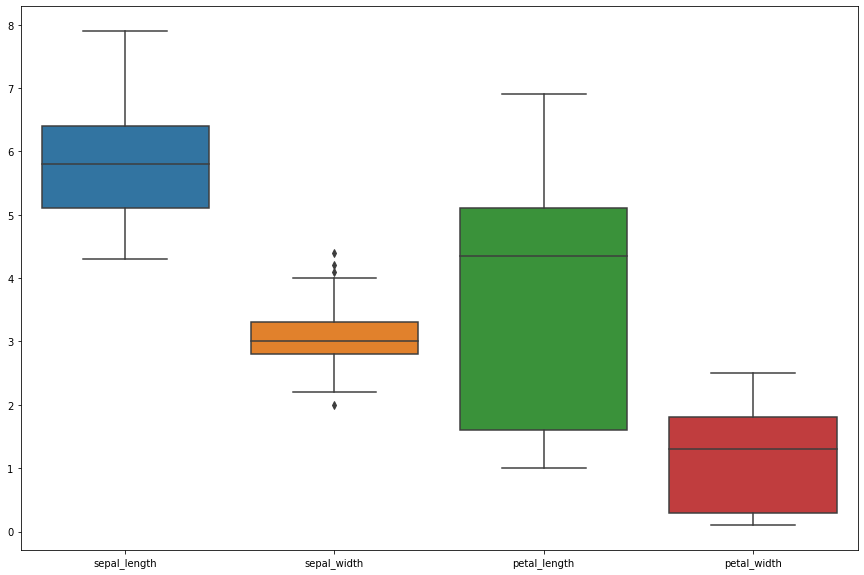

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)

### Handling outlier

In [11]:
col=dataset.select_dtypes("float64").columns
col

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [12]:
for i in col:
    percentiles = dataset[i].quantile([0.25,0.75]).values
    dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]
    dataset[i][dataset[i] >= percentiles[1]] = percentiles[1]

C:\Users\yamin\AppData\Local\Temp\ipykernel_8188\285125649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]
C:\Users\yamin\AppData\Local\Temp\ipykernel_8188\285125649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i][dataset[i] >= percentiles[1]] = percentiles[1]


<AxesSubplot:>

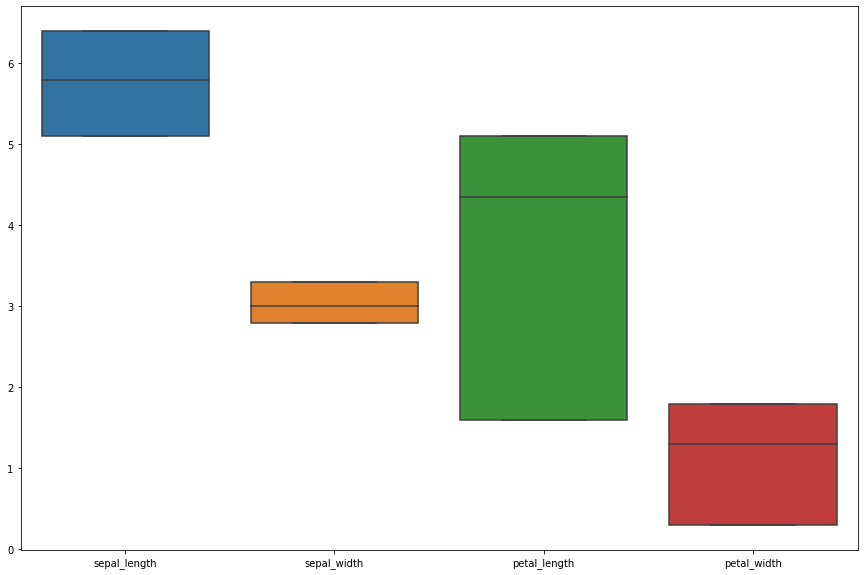

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)

In [14]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

## Data encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
y=le.fit_transform(y)

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:

sc=StandardScaler()
x=sc.fit_transform(x)

In [21]:
x

array([[-1.27230849,  1.28300581, -1.36827856, -1.35812345],
       [-1.27230849, -0.19738551, -1.36827856, -1.35812345],
       [-1.27230849,  0.78954203, -1.36827856, -1.35812345],
       [-1.27230849,  0.29607826, -1.36827856, -1.35812345],
       [-1.27230849,  1.28300581, -1.36827856, -1.35812345],
       [-0.70823084,  1.28300581, -1.30140277, -1.19669832],
       [-1.27230849,  1.28300581, -1.36827856, -1.35812345],
       [-1.27230849,  1.28300581, -1.36827856, -1.35812345],
       [-1.27230849, -0.69084928, -1.36827856, -1.35812345],
       [-1.27230849,  0.29607826, -1.36827856, -1.35812345],
       [-0.70823084,  1.28300581, -1.36827856, -1.35812345],
       [-1.27230849,  1.28300581, -1.36827856, -1.35812345],
       [-1.27230849, -0.19738551, -1.36827856, -1.35812345],
       [-1.27230849, -0.19738551, -1.36827856, -1.35812345],
       [ 0.04387271,  1.28300581, -1.36827856, -1.35812345],
       [-0.14415318,  1.28300581, -1.36827856, -1.19669832],
       [-0.70823084,  1.

## Data train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

## Model building

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,classification_report

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression 

In [27]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred_using_logistic=logistic_model.predict(x_test)

In [28]:
accuracy=accuracy_score(y_test,y_pred_using_logistic)
accuracy

0.9473684210526315

### KNN Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier 

In [30]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
y_pred_using_KNN=KNN_model.predict(x_test)

In [31]:
accuracy=accuracy_score(y_test,y_pred_using_KNN)
accuracy

0.9210526315789473

### Support vector classification

In [32]:
from sklearn.svm import SVC
#hyperparameter tuning libraries
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']} 
SVC_model = GridSearchCV(SVC(), param_grid)
SVC_model.fit(x_train, y_train)
y_pred_using_SVC=SVC_model.predict(x_test)
print(SVC_model.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [34]:
accuracy=accuracy_score(y_test,y_pred_using_SVC)
accuracy

0.9210526315789473

### Decision tree classification

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [36]:
Decisiontree_model=DecisionTreeClassifier()
Decisiontree_model.fit(x_train,y_train)
y_pred_using_Decisiontree=Decisiontree_model.predict(x_test)

[Text(0.34615384615384615, 0.9166666666666666, 'X[2] <= -0.8\ngini = 0.665\nsamples = 112\nvalue = [36, 41, 35]'),
 Text(0.2692307692307692, 0.75, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.4230769230769231, 0.75, 'X[3] <= 0.821\ngini = 0.497\nsamples = 76\nvalue = [0, 41, 35]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[2] <= 0.905\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'X[3] <= 0.579\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.15384615384615385, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6923076923076923, 0.5833333333333334, 'X[3] <= 0.983\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.5384615384615384, 0.4166666666666667, 'X[2] <= 0.738\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.

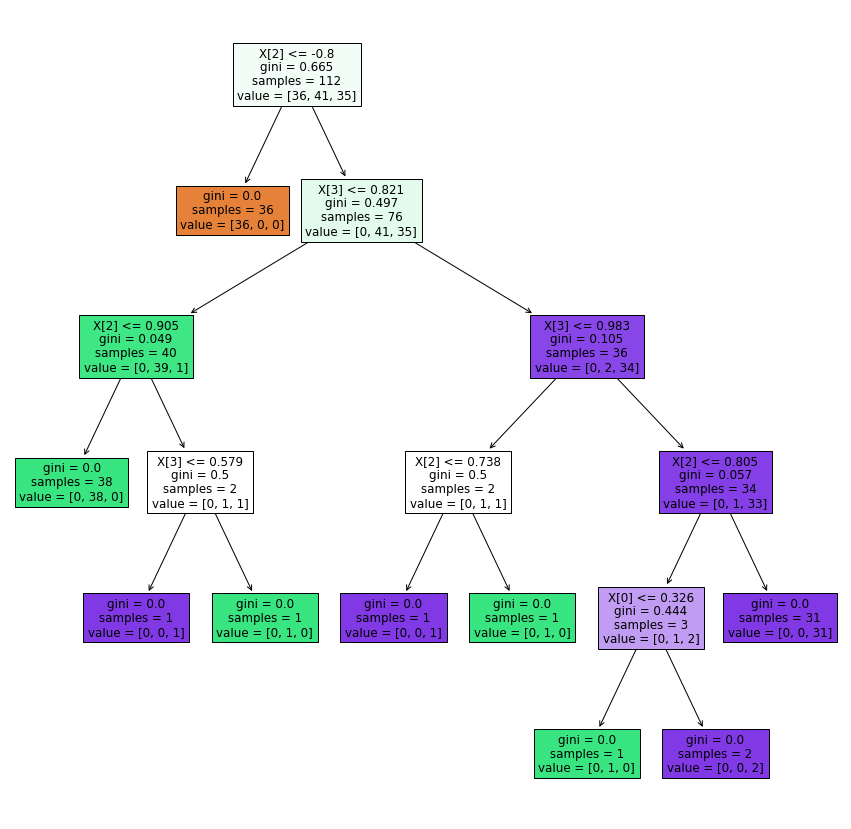

In [37]:
plt.figure(figsize=(15,15))
tree.plot_tree(Decisiontree_model,filled=True)

In [38]:
accuracy=accuracy_score(y_test,y_pred_using_Decisiontree)
accuracy

0.9736842105263158

### Random Forest Classification

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest_model=RandomForestClassifier(random_state=100)
random_forest_model.fit(x_train,y_train)
y_pred_using_random_forest=random_forest_model.predict(x_test)

In [41]:
accuracy=accuracy_score(y_test,y_pred_using_random_forest)
accuracy

0.9210526315789473

### Naive bayes 

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
naive_bayes_model=GaussianNB()
naive_bayes_model.fit(x_train,y_train)
y_pred_using_naive_bayes=naive_bayes_model.predict(x_test)

In [59]:
accuracy=accuracy_score(y_test,y_pred_using_naive_bayes)
accuracy

0.9473684210526315